<a href="https://colab.research.google.com/github/eminshall/QuantFinanceWorkbooks/blob/main/Forex_Gym_Anytrading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Installs & Imports

In [1]:
pip install gym-anytrading stable_baselines3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.2/172.2 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.7/181.7 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 7.2 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import gymnasium as gym
import gym_anytrading
from gym_anytrading.envs import Actions

from stable_baselines3 import A2C

#import quantstats as qs

## Data Wrangle

In [3]:
from gym_anytrading.datasets import FOREX_EURUSD_1H_ASK

df = gym_anytrading.datasets.FOREX_EURUSD_1H_ASK.copy()

df

,Open,High,Low,Close,Volume
Time,,,,,
2017-01-01 22:00:00,1.05236,1.05253,1.05221,1.05227,1.435400e+08
2017-01-01 23:00:00,1.05227,1.05426,1.05226,1.05282,2.531400e+08
2017-02-01 00:00:00,1.05283,1.05283,1.05268,1.05281,1.314000e+08
2017-02-01 01:00:00,1.05282,1.05286,1.05225,1.05240,2.739400e+08
2017-02-01 02:00:00,1.05239,1.05240,1.05164,1.05220,2.581400e+08
...,...,...,...,...,...
2017-12-29 17:00:00,1.20224,1.20257,1.20191,1.20218,9.283300e+09
2017-12-29 18:00:00,1.20218,1.20242,1.20122,1.20139,7.366750e+09
2017-12-29 19:00:00,1.20139,1.20144,1.20073,1.20096,7.205770e+09


In [4]:
import yfinance as yf

raw = yf.download('EURUSD=X')
raw

/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-12-01,1.203398,1.204007,1.194401,1.196501,1.196501,0
2003-12-02,1.196101,1.210903,1.194600,1.208897,1.208897,0
2003-12-03,1.209000,1.213003,1.207700,1.212298,1.212298,0
2003-12-04,1.212004,1.214403,1.204398,1.208094,1.208094,0
2003-12-05,1.207802,1.219096,1.206593,1.218695,1.218695,0
...,...,...,...,...,...,...
2024-03-04,1.084269,1.086649,1.083858,1.084269,1.084269,0
2024-03-05,1.085517,1.087536,1.084269,1.085517,1.085517,0
2024-03-06,1.085600,1.091405,1.084293,1.085600,1.085600,0


## Make Environment & Agent

In [5]:
window_size = 10
start_index = window_size
end_index = len(df)

env = gym.make(
    'forex-v0',
    df=df,
    window_size=window_size,
    frame_bound=(start_index, end_index)
)

print("observation_space:", env.observation_space)

observation_space: Box(-10000000000.0, 10000000000.0, (10, 2), float32)


In [6]:
env.reset()
model = A2C('MlpPolicy', env, verbose=0)
model.learn(total_timesteps=10000)

## Test Agent

In [7]:
action_stats = {Actions.Sell: 0, Actions.Buy: 0}

observation, info = env.reset()

while True:
    # action = env.action_space.sample()
    action, _states = model.predict(observation)

    action_stats[Actions(action)] += 1
    observation, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated

    # env.render()
    if done:
        break

env.close()

print("action_stats:", action_stats)
print("info:", info)

action_stats: {<Actions.Sell: 0>: 111, <Actions.Buy: 1>: 6103}
info: {'total_reward': 1074.4905471801758, 'total_profit': 0.9558409629553039, 'position': <Positions.Long: 1>}


# Evaluate

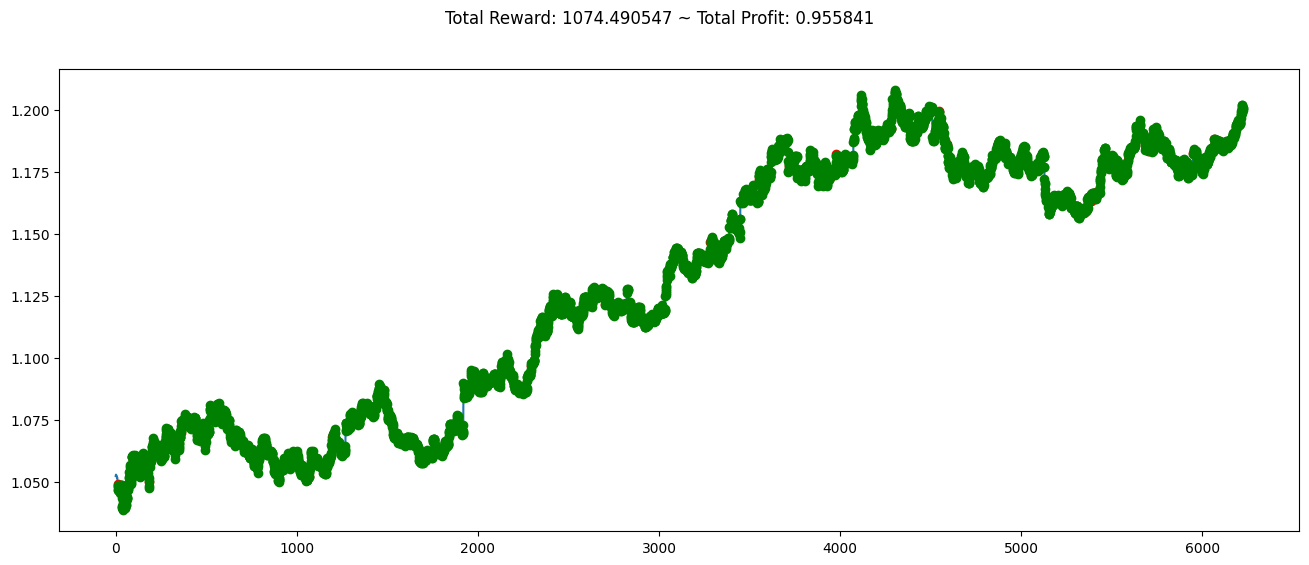

In [8]:
plt.figure(figsize=(16, 6))
env.unwrapped.render_all()
plt.show()

# Consider Joining the Newsletter

Get updateds on new videos, code, and discounts on future products / services


https://witty-motivator-1414.ck.page/acb393f729